### Readme
This notebook demonstrates the process of feature engineering using TF-IDF vectorization and PCA for dimensionality reduction. We will walk through the following steps:

1. **Data Preprocessing:** Clean and preprocess the text data.
2. **TF-IDF Vectorization:** Transform the cleaned text data into TF-IDF vectors.
3. **PCA Transformation:** Apply PCA to reduce the dimensionality of the TF-IDF vectors.
4. **Variance Analysis:** Analyze the explained variance to determine the effectiveness of the PCA transformation.

## Contents
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Load Data](#2.-Load-Data)
- [3. Vocabulary Size](#3.-Vocabulary-Size)
- [4. TF-IDF Vectorization and Feature Count](#4.-TF-IDF-Vectorization-and-Feature-Count)
- [5. Determining the Number of Principal Components for Desired Variance Explained](#5.-Determining-the-Number-of-Principal-Components-for-Desired-Variance-Explained)
- [6. PCA Transformation and Variance Analysis](#6.-PCA-Transformation-and-Variance-Analysis)
- [7. Conclusion](#7.-Conclusion)
- [8. Convert the reduced TF-IDF vectors to a DataFrame](#8.-Convert-the-reduced-TF-IDF-vectors-to-a-DataFrame
)



### Import and Get Data

In [1]:
# 1. Import
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.feature_extraction.text import CountVectorizer

# 2. Get data
df = pd.read_csv('transformed_data_exp_2.csv')
df.shape


(18051, 9)

### Find out Vocabulary size

In [6]:
text_data = df['clean_lemm_preprocessed_text'].tolist()
vectorizer = CountVectorizer()
vectorizer.fit_transform(text_data)

# Vocabulary size
vocabulary_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 60906


### TF-IDF Vectorization and Feature Count

In [2]:
# 3. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.99, 
    min_df=10
)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['clean_lemm_preprocessed_text'])

# Count the number of features
num_features = len(tfidf_vectorizer.get_feature_names_out())
print(f"Number of features created: {num_features}")

Number of features created: 7496


### Determining the Number of Principal Components for Desired Variance Explained

In [11]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca.fit(tfidf_vectors.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Thresholds for explained variance
thresholds = [0.95, 0.90, 0.85]

# Find the number of components for each threshold
num_components = {threshold: np.argmax(cumulative_explained_variance >= threshold) + 1 for threshold in thresholds}

# Print the number of components for each threshold
for threshold, components in num_components.items():
    print(f"Number of components to explain {threshold * 100}% variance: {components}")


Number of components to explain 95.0% variance: 3030
Number of components to explain 90.0% variance: 1914
Number of components to explain 85.0% variance: 1314


Analyzing the result we can say that 1300 features will explain more than 85% variance

### PCA Transformation and Variance Analysis

Using 1300 components
Working on PCA
Elapsed time: 127.91101312637329 seconds
Number of features after PCA: 1300


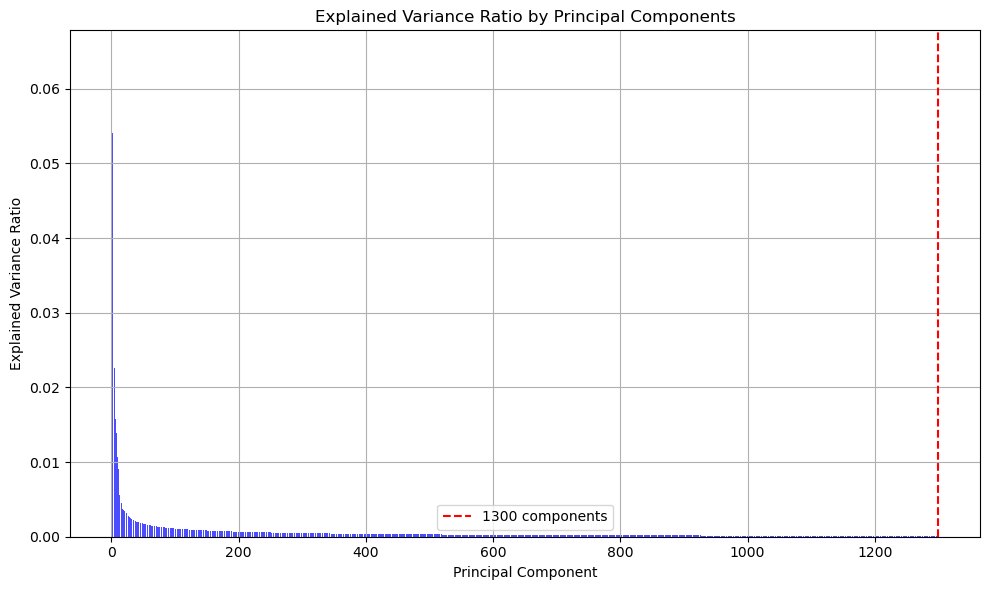

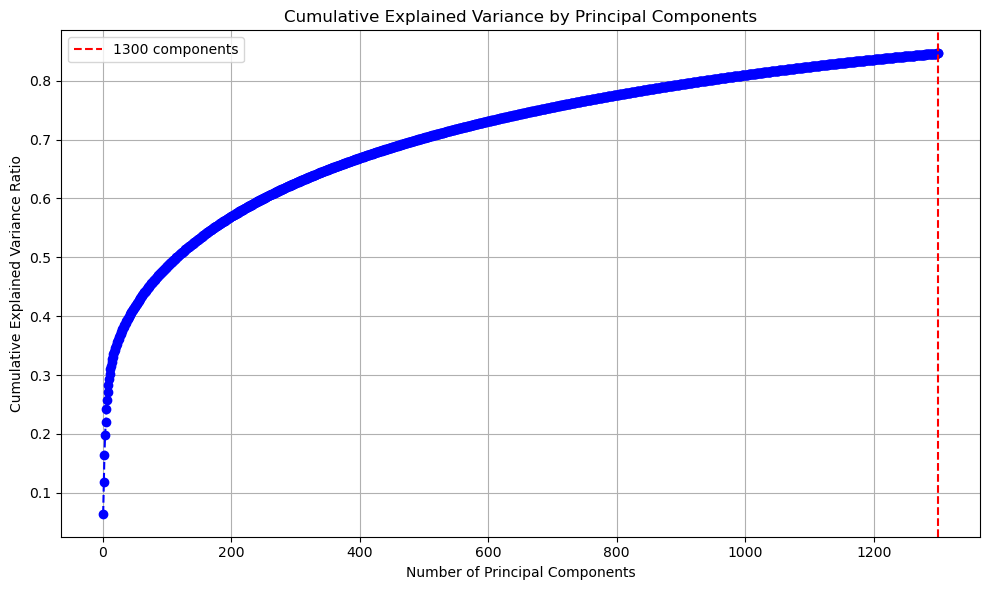

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with 1300 components
pca = PCA(n_components=1300)
pca.fit(tfidf_vectors.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the number of components
print("Using 1300 components")

# Refit PCA with 1300 components
print("Working on PCA")
start_time = time.time()
tfidf_vectors_reduced = pca.fit_transform(tfidf_vectors.toarray())
end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")

# Count the number of features after PCA
num_features_reduced = tfidf_vectors_reduced.shape[1]
print(f"Number of features after PCA: {num_features_reduced}")

# Plot explained variance ratio as a histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b', alpha=0.7)
plt.axvline(x=1300, color='r', linestyle='--', label='1300 components')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('explained_variance_ratio_histogram.png')

# Show the plot
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axvline(x=1300, color='r', linestyle='--', label='1300 components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_explained_variance_ratio_plot.png')

# Show the plot
plt.show()


### Conclusion

- **Cumulative Explained Variance Plot**
The cumulative explained variance plot shows that 1300 components are required to capture slightly over 85% of the total variance. The curve rises steeply initially and then starts to flatten out, indicating diminishing returns for each additional component.
- **Explained Variance Ratio Histogram**
The histogram shows that the first few principal components explain a significant portion of the variance, while the contribution of each subsequent component rapidly decreases.
- **Conclusion**
Based on the analysis, 1300 components were selected to capture slightly over 85% of the variance. This decision is based on the best practice of not creating a number of features that exceeds 10% of the 13,000 rows in the dataset. Choosing fewer components would capture significantly less variance and may not be sufficient for effective data representation.

### Convert the reduced TF-IDF vectors to a DataFrame

In [18]:
tfidf_features_df = pd.DataFrame(tfidf_vectors_reduced, columns=[f'tfidf_feature_{i}' for i in range(1, num_features_reduced + 1)])
# Export the reduced TF-IDF features to a CSV file
tfidf_features_df.to_csv('tfidf_features_exp_2.csv', index=False)

In [19]:
tfidf_features_df.shape

(18051, 1300)

In [20]:
tfidf_features_df.head()

,tfidf_feature_1,tfidf_feature_2,tfidf_feature_3,tfidf_feature_4,tfidf_feature_5,tfidf_feature_6,tfidf_feature_7,tfidf_feature_8,tfidf_feature_9,tfidf_feature_10,...,tfidf_feature_1291,tfidf_feature_1292,tfidf_feature_1293,tfidf_feature_1294,tfidf_feature_1295,tfidf_feature_1296,tfidf_feature_1297,tfidf_feature_1298,tfidf_feature_1299,tfidf_feature_1300
0,-0.040691,-0.050105,-0.016486,0.074816,0.408716,0.074145,0.168277,-0.078291,-0.025441,-0.067778,...,-0.002506,-0.011912,0.004882,0.007440,0.015452,-0.010794,0.020366,0.006662,-0.020205,0.010390
1,-0.055458,-0.061811,-0.013799,0.090925,0.551824,0.078572,0.265133,-0.100249,-0.016853,-0.179938,...,-0.006259,-0.003374,-0.001629,-0.014284,-0.007902,0.003364,0.003912,-0.000661,0.013900,-0.003761
2,0.528772,0.135876,0.008082,-0.040504,-0.080440,-0.000976,0.038992,-0.102444,-0.072109,-0.016688,...,-0.013100,0.019167,-0.016713,-0.002862,-0.010954,-0.005106,0.002185,-0.003971,-0.014638,-0.001101
3,-0.277869,0.447509,-0.004394,-0.064077,-0.015669,-0.017686,-0.008404,0.023507,-0.011034,-0.019734,...,0.006568,-0.017004,0.005746,-0.002621,-0.018733,0.001271,-0.014179,0.001328,0.000835,0.004552
4,-0.050562,-0.063374,-0.008081,0.089009,0.496256,0.081958,0.211691,-0.113303,-0.012863,-0.097411,...,0.000263,-0.001662,-0.007233,0.003478,-0.002804,0.004634,0.007583,-0.006371,0.004315,0.000387
